<a href="https://colab.research.google.com/github/Le4o/topicos-avancados-ic/blob/main/reducao_de_dimensionalidade_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redução de Dimensionalidade
#### Exercício da matéria de Tópicos Avançados em Inteligência Computacional

Grupo:
- João Victor de Sledz Bulhões
- Leonardo de Andrade Santana
- Lis da Silva Azevedo

### Definição do Exercício

CIFAR10 é dataset de 50.000 imagens coloridas de treinamento com resolução de 32x32 e 10.000 imagens de teste, rotuladas em 10 categorias.

Agora, a partir dos conhecimentos adquiridos até o momento, realizem a redução de dimensionalidade do dataset CIFAR10, comparando as técnicas e seus resultados. Após a redução, implementem uma rede neural para a classificação utilizando cada conjunto de dados(Normal, PCA, AE e VAE).

Como sempre, escrevam com capricho o trabalho, apresentem a análise exploratória, fundamentação, metodologia, resultados, discussões e conclusões, avaliando qualitativa e quantitativamente o desempenho do modelo gerado, utilizando todos os conceitos e métodos até aqui aprendidos.

Referência: https://keras.io/api/datasets/cifar10/

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Carregando dados utilizando o dataset do keras
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print('Número de imagens:', len(x_train))
print('Número de Imagens de teste:', len(x_test))

170508288/170498071 [==============================] - 6s 0us/step
Número de imagens: 50000
Número de Imagens de teste: 10000


Imagem de número 500
Título: dog


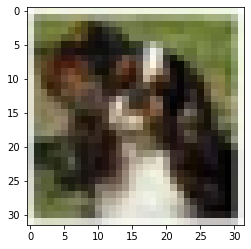

In [3]:
# Labels/tipos das imagens do dataset
label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}

number_image = 500
print('Imagem de número', number_image)
print('Título:', label_dict[y_train[number_image][0]])
plt.imshow(x_train[number_image])

In [4]:
import pandas as pd

# Fazer o reshape das imagens de 3 para 1
# 32 x 32 x 3 = 3072
print('Shape do x_train: ', x_train.shape)
x_train_flat = x_train.reshape(-1,3072)
print('Shape do x_train_flat: ', x_train_flat.shape)

# Criando coluna para cada pixel
columns = ['c' + str(i) for i in range(x_train_flat.shape[1])]

# Criando o dataFrame e adicionando a coluna do target
df = pd.DataFrame(x_train_flat, columns=columns)
df['target'] = y_train
df


Shape do x_train:  (50000, 32, 32, 3)
Shape do x_train_flat:  (50000, 3072)


,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37,c38,c39,...,c3033,c3034,c3035,c3036,c3037,c3038,c3039,c3040,c3041,c3042,c3043,c3044,c3045,c3046,c3047,c3048,c3049,c3050,c3051,c3052,c3053,c3054,c3055,c3056,c3057,c3058,c3059,c3060,c3061,c3062,c3063,c3064,c3065,c3066,c3067,c3068,c3069,c3070,c3071,target
0,59,62,63,43,46,45,50,48,43,68,54,42,98,73,52,119,91,63,139,107,75,145,110,80,149,117,89,149,120,93,131,103,77,125,99,76,142,115,91,144,...,148,103,77,161,105,69,144,95,55,112,90,59,119,91,58,130,96,65,120,87,59,92,67,46,103,78,57,170,140,104,216,184,140,151,118,84,123,92,72,6
1,154,177,187,126,137,136,105,104,95,102,101,99,125,131,139,155,166,180,172,190,210,180,199,214,142,156,156,111,120,110,106,107,98,109,104,102,123,121,117,127,...,5,6,11,6,6,11,10,9,12,25,22,22,51,45,42,68,64,67,90,90,101,116,113,122,134,127,133,140,130,136,143,133,139,143,134,142,143,133,144,9
2,255,255,255,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,...,76,90,90,72,86,86,64,78,78,64,78,78,69,83,83,66,80,80,55,69,69,52,66,66,58,72,72,68,80,79,78,85,83,79,85,83,80,86,84,9
3,28,25,10,37,34,19,38,35,20,42,37,23,44,39,25,40,37,22,40,38,23,24,23,9,32,25,15,43,27,19,30,20,10,32,30,17,41,37,23,52,...,122,99,67,107,85,54,112,96,66,92,81,53,80,62,39,96,78,59,77,67,42,85,76,44,84,75,48,67,57,38,54,47,28,63,56,37,72,65,46,4
4,170,180,198,168,178,196,177,185,203,183,193,211,181,196,218,177,195,220,181,195,223,184,192,223,189,190,223,189,189,222,188,193,224,183,194,223,182,194,223,184,...,93,98,102,90,95,99,88,93,97,83,89,92,77,87,88,75,84,85,71,81,82,74,80,83,72,76,79,71,75,78,75,79,82,71,75,78,73,77,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,145,161,194,151,166,199,156,171,205,155,173,203,153,173,201,153,172,201,157,177,205,161,180,210,161,180,212,161,180,212,162,181,213,165,184,216,164,183,215,163,...,51,56,75,49,55,72,50,56,72,50,56,72,46,52,68,44,48,64,44,46,61,46,48,63,42,44,59,40,42,57,39,41,56,36,38,53,37,39,54,2
49996,255,245,132,254,247,134,255,249,137,254,251,138,254,251,138,254,248,135,254,242,130,253,239,128,254,241,129,254,244,131,254,244,132,254,243,129,253,240,127,254,...,244,168,61,247,171,65,237,157,55,240,160,57,245,167,61,246,169,64,249,176,68,248,171,64,245,174,76,249,175,82,249,174,79,252,181,81,253,181,76,6
49997,35,178,235,40,176,239,42,176,241,39,180,239,43,181,237,45,180,237,48,181,238,51,181,239,53,183,241,56,183,241,58,182,242,59,182,242,58,183,240,61,...,47,71,97,53,77,102,52,73,96,46,68,91,45,68,94,50,77,104,50,77,103,45,71,96,42,68,93,36,62,87,27,52,77,21,43,66,12,31,50,9
49998,189,211,240,186,208,236,185,207,235,184,207,235,182,206,234,181,205,232,180,204,232,180,204,233,181,205,235,180,204,234,179,202,233,180,202,232,183,202,229,185,...,114,112,103,142,141,130,164,162,149,175,171,160,184,177,166,190,181,171,190,182,171,193,186,172,192,185,169,190,182,165,195,184,169,196,189,171,195,190,171,1


### PCA
Utilizando o `Principal Components Analysis (PCA)`.

In [16]:
from sklearn.decomposition import PCA

n_components = 2
components_columns = ['C%d' % i for i in range(1, n_components+1)]

# Usando o método PCA com dois componentes
# e preparando para o fit_transform
pca = PCA(n_components=n_components)
components = pca.fit_transform(x_train_flat)

# Convertendo os novos dados de numpy array para um novo dataFrame
df_pca = pd.DataFrame(components, columns=components_columns)
df_pca['target'] = df['target'].copy()

df_pca 

,C1,C2,target
0,-1632.259496,695.904892,6
1,211.594763,-242.235480,9
2,1971.200943,-2938.136149,9
3,-2638.693419,2.738235,4
4,-669.541001,-1267.156142,1
...,...,...,...
49995,1812.039498,-1492.011137,2
49996,1585.305450,484.184912,6
49997,180.373380,-2892.342852,9
49998,2898.816799,-860.874316,1


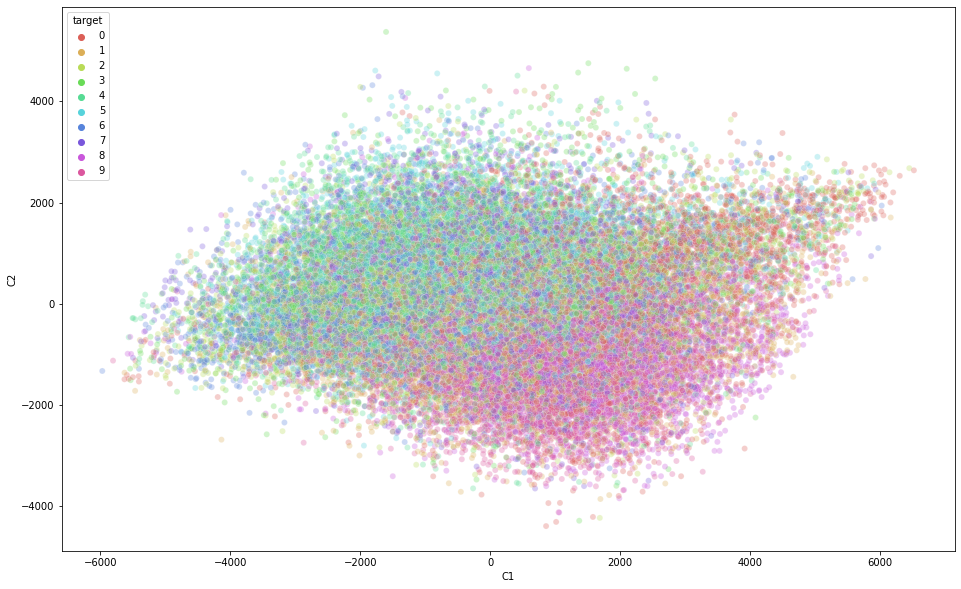

In [18]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="C1", y="C2",
    hue="target",
    palette=sns.color_palette("hls", 10),
    data=df_pca,
    legend="full",
    alpha=0.3
)

É possíver verificar que a variação foi capturada ao longo do componente X. Os pontos pertencentes à mesma classe estão próximos uns dos outros e as imagens que são muito diferentes estão mais distantes.

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

pca_reconstructed = pca.inverse_transform(df_pca[components_columns])
MSE = mean_squared_error(df.iloc[:, :-1], pca_reconstructed)
MAE = mean_absolute_error(df.iloc[:, :-1], pca_reconstructed)
variance = pca.explained_variance_ratio_.sum()

In [25]:
print('MSE: {:.2f}'.format(MSE))
print('MAE: {:.2f}'.format(MAE))
print('VARIANCE: {:.2f}'.format(variance))

MSE: 2404.84
MAE: 38.57
VARIANCE: 0.40


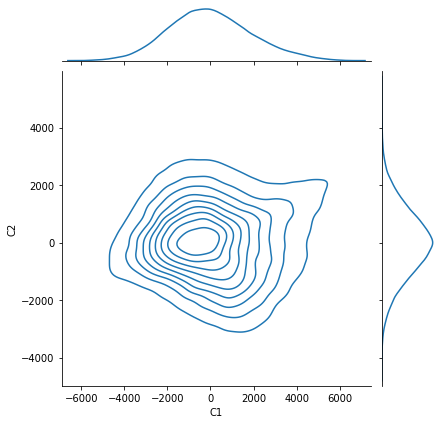

In [26]:
sns.jointplot(data=df_pca, x='C1', y='C2', kind = 'kde')
plt.show()